## if문이 왜 필요할까?

In [1]:
"돈이 있으면, 택시를 타고 없으면, 걸어가라"

'돈이 있으면, 택시를 타고 없으면, 걸어가라'

In [2]:
money = True
if money:
    print('택시를 타고 가라')
else:
    print('걸어가라')

택시를 타고 가라


### if문의 기본 구조

 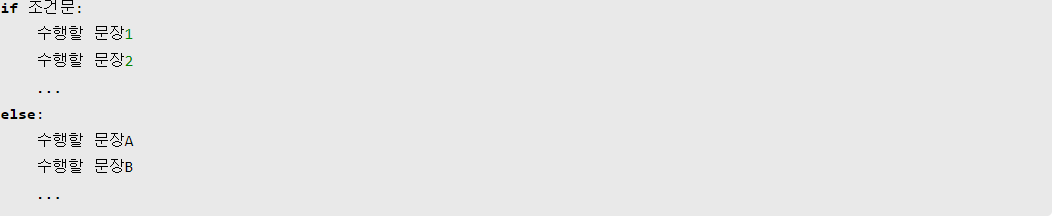

### 들여쓰기(indentation)-1

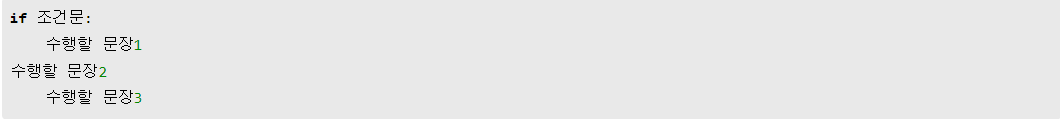 

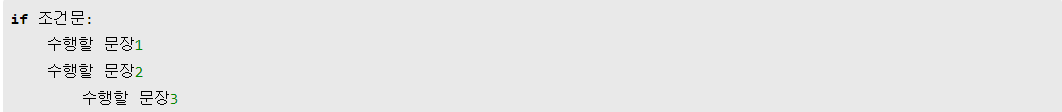 

위와 같은 indentation이라면 error가 호출될 것이다. 

##### 'space bar' 4개의 공백 vs 'tab'과 indentation시 어느 것이 더 좋을까요??

In [3]:
'만약 3800원 이상의 돈을 가지고 있으면 택시를 타고 그렇지 않으면 걸어가라.'

'만약 3800원 이상의 돈을 가지고 있으면 택시를 타고 그렇지 않으면 걸어가라.'

In [4]:
money = 10000000000000
if money>=3800:
    print('택시를 타고가라')
else:
    print('걸어가라')

택시를 타고가라


In [5]:
'만약 3800원 이상의 돈을 가지고 있거나 혹은 카드가 있다면 택시를 타고 그렇지 않으면 걸어가라.'

'만약 3800원 이상의 돈을 가지고 있거나 혹은 카드가 있다면 택시를 타고 그렇지 않으면 걸어가라.'

In [6]:
money = 2000
card = True
if money>=3800 or card:
    print('택시를 타고 가라')
else:
    print('걸어가라')

택시를 타고 가라


In [7]:
'만약 주머니에 카드가 있으면 택시를 타고, 없으면 걸어가라.'

'만약 주머니에 카드가 있으면 택시를 타고, 없으면 걸어가라.'

In [8]:
주머니=['card','wallet','cellphone']

if 'card' in 주머니:
    print('택시를 타라')
else:
    print('걸어가라')

택시를 타라


In [9]:
'만약 주머니에 돈이 있거나 카드가 있으면 택시를 타고, 없으면 걸어가라.'

'만약 주머니에 돈이 있거나 카드가 있으면 택시를 타고, 없으면 걸어가라.'

In [10]:
pocket = ['paper', 'cellphone']
money = 2000

if money>=3800:
    print('택시를 타고가라')
else:
    if 'card' in pocket:
        print('택시를 타고가라')
    else:
        print('걸어가라')      

걸어가라


## elif를 살펴보기

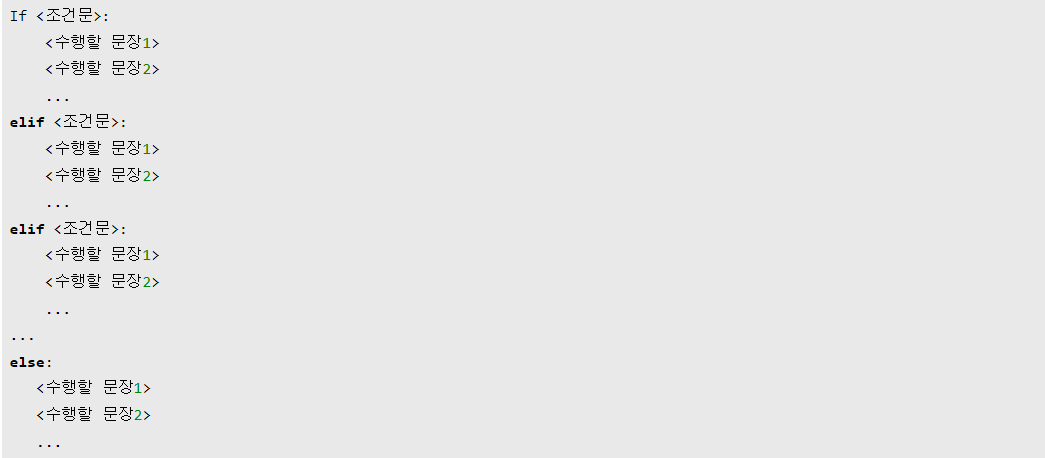 

In [11]:
if money>=3800:
    print('택시를 타고가라')
elif 'card' in pocket:
    print('택시를 타고가라')
else:
    print('걸어가라')      

걸어가라


## 조건부 표현식

In [12]:
score = 60 

if score >= 60:
    message = 'success'
else:
    message = 'failure'

In [13]:
message = 'success' if score >= 60   else  'failure' # 도치구문

## 01_Titanic Pandas Exercise

In [14]:
def get_square(x):
    return x **2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [15]:
lambda_square = lambda x: x**2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


In [16]:
a = [1,2,3]

result = map(lambda x: x**2, a)
list(result)

[1, 4, 9]

판다스의 df의 lambda식을 적용하여 문제를 풀어봅시다 :: 데이터 가공 

In [20]:
len(t_df['Name'])

891

In [21]:
# 만약에 apply lambda를 모를때
result=[]
for i in range(len(t_df['Name'])):
    result.append(len(t_df['Name'][i]))
    
result_df = pd.DataFrame(result)
t_df['na_len'] = result_df
t_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,na_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,51


In [29]:
## Q1. 실습문제~ :: Name 컬럼을 가져오시고, Name 컬럼의 각 value의 이름 길이를 구해보세요~

import pandas as pd
t_df = pd.read_csv('D:/pythonTest/train.csv')
t_df['Name_Len'] = t_df['Name'].apply(lambda x: len(x))
t_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51


In [39]:
## Q2. 실습문제~ :: 30를 기준으로 - 30세 미만이면 'Young', 30세 초과면 'Adult'
# Age 컬럼을 가져온다

t_df['Age'] # young_adult라는 컬럼을 위를 기준으로 한 등간척도를 생성하세요.
t_df['young_adult'] = t_df['Age'].apply(lambda x: 'young' if x<30 else 'Adult')
t_df['young_adult'].value_counts()

t_df.groupby(by=['young_adult']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len
young_adult,,,,,,,,,,,,,
Adult,507,507,507,507,507,330,507,507,507,507,139,505,507
young,384,384,384,384,384,384,384,384,384,384,65,384,384


In [41]:
## Q3. 실습문제~ :: 30를 기준으로 - 30세 미만이면 'Young', 60세 미만이면 'Adult', 60세 초과는 'elderly'
# Age 컬럼을 가져온다

t_df['Age'].apply(lambda x: 'young' if x<30 else ('adult' if x<60 else 'elderly'))

0        young
1        adult
2        young
3        adult
4        adult
        ...   
886      young
887      young
888    elderly
889      young
890      adult
Name: Age, Length: 891, dtype: object

In [42]:
# end of file

In [43]:
def get_cat(age):
    char = ''
    if age<=5: char = 'baby'
    elif age<=12: char = 'child'
    elif age<=18: char = 'teen'
    elif age<=25: char = 'student'
    elif age<=35: char = 'young_adult'
    elif age<=60: char = 'adult'
    else: char= 'elderly'
        
    return char

In [44]:
t_df['Age'].apply(lambda x: get_cat(x))

0          student
1            adult
2      young_adult
3      young_adult
4      young_adult
          ...     
886    young_adult
887        student
888        elderly
889    young_adult
890    young_adult
Name: Age, Length: 891, dtype: object